In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Langkah 1: Membaca data
datasets = pd.read_csv('dengue_dataset.csv')

# Langkah 2: Eksplorasi data
print("Info dataset:")
datasets.info()
print("\nJumlah missing values:")
print(datasets.isnull().sum())

# Langkah 3: Preprocessing
# Encoding fitur Gender menjadi 0 dan 1
def encode_gender(value):
    return 0 if value == 'Female' else 1

datasets['Gender'] = datasets['Gender'].apply(encode_gender)

# One-Hot Encoding untuk fitur Body_Pain
encoder = OneHotEncoder(sparse_output=False, drop=None)  # Menjaga semua kategori
body_pain_encoded = encoder.fit_transform(datasets[['Body_Pain']])

# Menambahkan hasil One-Hot Encoding ke dataset
encoded_columns = encoder.get_feature_names_out(['Body_Pain'])
body_pain_df = pd.DataFrame(body_pain_encoded, columns=encoded_columns)

# Menggabungkan data hasil encoding
datasets = pd.concat([datasets.drop('Body_Pain', axis=1), body_pain_df], axis=1)

# Fitur yang akan digunakan
numerical_features = ['Temperature', 'Platelet_Count', 'White_Blood_Cell_Count', 'Rash', 'Gender'] + list(encoded_columns)
target = 'Infected'

# Memisahkan fitur (X) dan target (y)
X = datasets[numerical_features]
y = datasets[target]

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data numerik menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 4: Pelatihan model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Evaluasi model
y_pred = gnb.predict(X_test_scaled)
print("\nAkurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

# Langkah 5: Prediksi data baru
# Data baru untuk prediksi
input_data = pd.DataFrame([{
    'Temperature': 98.7,
    'Platelet_Count': 168000,
    'White_Blood_Cell_Count': 6800,
    'Rash': 0,
    'Gender': 'Male',
    'Body_Pain': 2  # Contoh input Body_Pain dengan nilai 2
}])

# Encoding fitur Gender untuk data baru
input_data['Gender'] = input_data['Gender'].apply(encode_gender)

# One-Hot Encoding untuk fitur Body_Pain pada data baru
body_pain_new_encoded = encoder.transform(input_data[['Body_Pain']])
body_pain_new_df = pd.DataFrame(body_pain_new_encoded, columns=encoded_columns)

# Menggabungkan data hasil encoding
input_data = pd.concat([input_data.drop('Body_Pain', axis=1), body_pain_new_df], axis=1)

# Scaling fitur numerik pada data baru
input_data_scaled = scaler.transform(input_data)

# Prediksi
new_prediction = gnb.predict(input_data_scaled)
print("\nPrediksi untuk data baru:", new_prediction[0])


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Body_Pain               5000 non-null   int64  
 4   Rash                    5000 non-null   int64  
 5   Gender                  5000 non-null   object 
 6   Infected                5000 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 239.4+ KB

Jumlah missing values:
Temperature               0
Platelet_Count            0
White_Blood_Cell_Count    0
Body_Pain                 0
Rash                      0
Gender                    0
Infected                  0
dtype: int64

Akurasi model: 0.808

Laporan klasifikasi:
              precision    recall  f1-score   support

In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Rash                    5000 non-null   int64  
 4   Gender                  5000 non-null   int64  
 5   Infected                5000 non-null   bool   
 6   Body_Pain_0             5000 non-null   float64
 7   Body_Pain_1             5000 non-null   float64
 8   Body_Pain_2             5000 non-null   float64
dtypes: bool(1), float64(6), int64(2)
memory usage: 317.5 KB


In [ ]:
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Asumsikan data sudah diproses sesuai dengan kode sebelumnya
# Setelah pelatihan model selesai

# 1. Simpan Scaler
with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# 2. Simpan Model Gaussian Naive Bayes
with open('model1.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

# 3. Simpan OneHotEncoder (untuk Body_Pain)
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoder.fit(X_train[['Body_Pain']])  # Pastikan X_train memiliki kolom 'Body_Pain'

with open('encoder1.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Model, Scaler, dan Encoder berhasil disimpan!")


KeyError: "None of [Index([('Body_Pain_0', 'Body_Pain_1', 'Body_Pain_2')], dtype='object')] are in the [columns]"

In [2]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Langkah 1: Membaca data
datasets = pd.read_csv('dengue_dataset.csv')

# Langkah 2: Eksplorasi data
print("Info dataset:")
datasets.info()
print("\nJumlah missing values:")
print(datasets.isnull().sum())

# Langkah 3: Preprocessing
# Encoding fitur Gender menjadi 0 dan 1
def encode_gender(value):
    return 0 if value == 'Female' else 1

datasets['Gender'] = datasets['Gender'].apply(encode_gender)

# One-Hot Encoding untuk fitur Body_Pain
encoder = OneHotEncoder(sparse_output=False, drop=None)  # Menjaga semua kategori
body_pain_encoded = encoder.fit_transform(datasets[['Body_Pain']])

# Menambahkan hasil One-Hot Encoding ke dataset
encoded_columns = encoder.get_feature_names_out(['Body_Pain'])
body_pain_df = pd.DataFrame(body_pain_encoded, columns=encoded_columns)

# Menggabungkan data hasil encoding
datasets = pd.concat([datasets.drop('Body_Pain', axis=1), body_pain_df], axis=1)

# Fitur yang akan digunakan
numerical_features = ['Temperature', 'Platelet_Count', 'White_Blood_Cell_Count', 'Rash', 'Gender'] + list(encoded_columns)
target = 'Infected'

# Memisahkan fitur (X) dan target (y)
X = datasets[numerical_features]
y = datasets[target]

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data numerik menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 4: Pelatihan model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Evaluasi model
y_pred = gnb.predict(X_test_scaled)
print("\nAkurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

# Menyimpan Model, Scaler, dan Encoder
with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('model1.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

with open('encoder1.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Model, Scaler, dan Encoder berhasil disimpan!")

# Langkah 5: Prediksi data baru
# Data baru untuk prediksi
input_data = pd.DataFrame([{
    'Temperature': 98.7,
    'Platelet_Count': 168000,
    'White_Blood_Cell_Count': 6800,
    'Rash': 0,
    'Gender': 'Male',
    'Body_Pain': 2  # Contoh input Body_Pain dengan nilai 2
}])

# Encoding fitur Gender untuk data baru
input_data['Gender'] = input_data['Gender'].apply(encode_gender)

# One-Hot Encoding untuk fitur Body_Pain pada data baru
body_pain_new_encoded = encoder.transform(input_data[['Body_Pain']])
body_pain_new_df = pd.DataFrame(body_pain_new_encoded, columns=encoded_columns)

# Menggabungkan data hasil encoding
input_data = pd.concat([input_data.drop('Body_Pain', axis=1), body_pain_new_df], axis=1)

# Scaling fitur numerik pada data baru
input_data_scaled = scaler.transform(input_data)

# Prediksi
new_prediction = gnb.predict(input_data_scaled)
print("\nPrediksi untuk data baru:", new_prediction[0])


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Body_Pain               5000 non-null   int64  
 4   Rash                    5000 non-null   int64  
 5   Gender                  5000 non-null   object 
 6   Infected                5000 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 239.4+ KB

Jumlah missing values:
Temperature               0
Platelet_Count            0
White_Blood_Cell_Count    0
Body_Pain                 0
Rash                      0
Gender                    0
Infected                  0
dtype: int64

Akurasi model: 0.808

Laporan klasifikasi:
              precision    recall  f1-score   support

In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Rash                    5000 non-null   int64  
 4   Gender                  5000 non-null   int64  
 5   Infected                5000 non-null   bool   
 6   Body_Pain_0             5000 non-null   float64
 7   Body_Pain_1             5000 non-null   float64
 8   Body_Pain_2             5000 non-null   float64
dtypes: bool(1), float64(6), int64(2)
memory usage: 317.5 KB



Akurasi model: 0.808

Laporan klasifikasi:
              precision    recall  f1-score   support

       False       0.89      0.85      0.87       736
        True       0.62      0.70      0.66       264

    accuracy                           0.81      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.82      0.81      0.81      1000



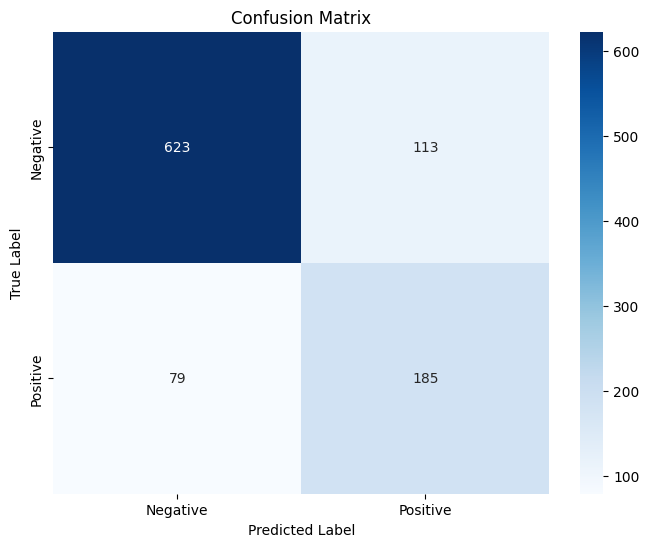

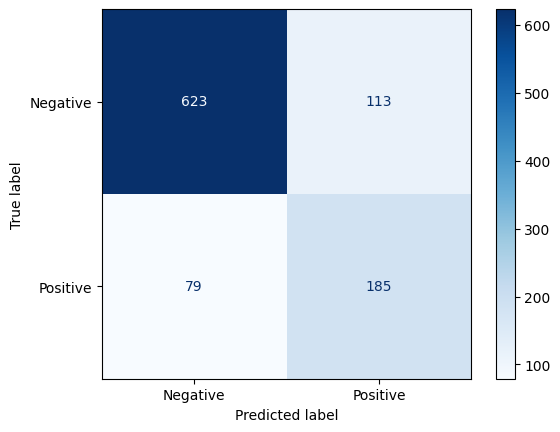


Probabilitas prediksi untuk 5 sampel pertama:
Sampel 1: Negatif=0.9986, Positif=0.0014
Sampel 2: Negatif=0.1808, Positif=0.8192
Sampel 3: Negatif=0.9993, Positif=0.0007
Sampel 4: Negatif=0.9993, Positif=0.0007
Sampel 5: Negatif=0.1371, Positif=0.8629


In [5]:
# Import library tambahan untuk evaluasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi model
y_pred = gnb.predict(X_test_scaled)

# Akurasi dan laporan klasifikasi
print("\nAkurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix secara visual menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Menampilkan confusion matrix secara bawaan dari Scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.show()

# Probabilitas prediksi
y_pred_proba = gnb.predict_proba(X_test_scaled)

# Menampilkan probabilitas prediksi untuk beberapa contoh
print("\nProbabilitas prediksi untuk 5 sampel pertama:")
for i in range(5):
    print(f"Sampel {i+1}: Negatif={y_pred_proba[i][0]:.4f}, Positif={y_pred_proba[i][1]:.4f}")
